# UM-Bridge with QMCPy

Using QMCPy to evaluate the [UM-Bridge Cantilever Beam Function](https://um-bridge-benchmarks.readthedocs.io/en/docs/forward-benchmarks/muq-beam-propagation.html) and approximate the expectation with respect to a uniform random variable. 

## Imports

In [93]:
import umbridge
import numpy as np
import time
from scipy.stats import qmc
from copy import deepcopy
#import docker

#the module needs to be local if any changes have been made locally
#uncomment line below to make local qmcpy the import (only need to be done once per session and can be commented out
import sys
sys.path.insert(0, '../../../../..') #may need to be changed to find correct path to QMCSoftware folder

#prints paths available on local system
#for p in sys.path:
#    print(p)

#import qmcpy as qp #non local module import
from QMCSoftware import qmcpy as qp #local module import

## Start Docker Container

See the [UM-Bridge Documentation](https://um-bridge-benchmarks.readthedocs.io/en/docs/index.html) for image options. 

In [78]:
!docker run --name muqbp_new -it -d -p 4242:4242 linusseelinger/model-muq-beam:latest
#!docker run --name muqbp_new -d -p 4242:4242 my-build
#https://stackoverflow.com/questions/43099116/error-the-input-device-is-not-a-tty
#running locally

docker: Error response from daemon: Conflict. The container name "/muqbp_new" is already in use by container "df5a2570f0756b49001d4a3d99e9f1a8c6459c2ea405976f609015030f349ef9". You have to remove (or rename) that container to be able to reuse that name.
See 'docker run --help'.


## Problem Setup

Initialize a QMCPy sampler and distribution.

In [79]:
sampler_DigitalNet=qp.DigitalNetB2(dimension=31,seed=7) # DISCRETE DISTRIBUTION, default = 3
distribution_DigitalNet = qp.Uniform(sampler_DigitalNet,lower_bound=1,upper_bound=1.05) # TRUE MEASURE

In [80]:
sampler_Lattice=qp.Lattice(dimension=31,seed=7) # DISCRETE DISTRIBUTION, default = 3
distribution_Lattice = qp.Uniform(sampler_Lattice,lower_bound=1,upper_bound=1.05) # TRUE MEASURE

In [81]:
sampler_Halton=qp.Halton(dimension=31,seed=7) # DISCRETE DISTRIBUTION, default = 3
distribution_Halton = qp.Uniform(sampler_Halton,lower_bound=1,upper_bound=1.05) # TRUE MEASURE

In [91]:
distribution_iid = qp.Uniform(qp.IIDStdUniform(3),lower_bound=1,upper_bound=1.05) #iid points for this problem

Initialize a UM-Bridge model and wrap it into a QMCPy compatible Integrand

In [119]:
model = umbridge.HTTPModel('http://localhost:4242', 'forward')
modeli = deepcopy(model) #and construct a model for just that deflection
output_dimension = 31
umbridge_config = {}
#DEBUG
print(umbridge_config)
print(model.get_input_sizes(umbridge_config))
print(model.get_output_sizes(umbridge_config))
print(distribution.d)

def lump(t):
    tnp = np.array(t[0])
    tnewnp = np.ones(output_dimension)
    tnewnp[:len(tnp)] = tnp
    return [tnewnp.tolist()]
    
integrand_DigitalNet = qp.UMBridgeWrapper(distribution_DigitalNet, model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump) # INTEGRAND
integrand_Lattice = qp.UMBridgeWrapper(distribution_Lattice, model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump) # INTEGRAND
integrand_Halton= qp.UMBridgeWrapper(distribution_Halton, model, umbridge_config, parallel=False, tf_input_to_umbridge_input = lump) # INTEGRAND
integrand_iid = qp.UMBridgeWrapper(iid,modeli,umbridge_config,parallel=False) #integrand

{}
[31]
[31]
31


## Model Evaluation

In [87]:
start_time = time.time()
x = sampler(16) # same as sampler.gen_samples(16)

print(x.shape) #prints (# of beams, input)

y = integrand_DigitalNet.f(x)
print(y.shape) #prints (# of beams, output)
print(type(y))
print(y.dtype)
print(y)

#time in seconds
end_time = time.time()
print(end_time - start_time)

(16, 31)
(16, 31)
<class 'numpy.ndarray'>
float64
[[    0.            46.98975085   182.05508529   397.83156536
    688.79584833  1052.49380192  1483.15937408  1975.01957768
   2523.71822969  3123.46083109  3771.05551711  4461.67782971
   5191.66273098  5956.40903367  6751.7601749   7574.90657812
   8422.08757696  9290.90654549 10177.73884734 11080.59080353
  11996.77895215 12923.86860323 13859.62262518 14802.19185296
  15750.09247835 16701.92027906 17656.43945593 18612.6502247
  19569.85233917 20527.48511842 21485.22622048]
 [    0.            45.88948198   178.2504701    392.73336588
    684.63380087  1048.25817775  1476.84149498  1965.51194126
   2510.38545764  3108.15184254  3752.75483781  4441.69135229
   5169.96740719  5932.68975958  6726.54456322  7547.99594809
   8394.31765993  9261.66024251 10147.36889121 11048.8323732
  11963.13600711 12888.42505442 13822.38592    14763.19468415
  15709.41316101 16659.48390654 17612.24082237 18566.73455145
  19522.17367684 20478.03618323 2143

In [89]:
start_time = time.time()
x = sampler(16) # same as sampler.gen_samples(16)

print(x.shape) #prints (# of beams, input)

y = integrand_Lattice.f(x)
print(y.shape) #prints (# of beams, output)
print(type(y))
print(y.dtype)
print(y)

#time in seconds
end_time = time.time()
print(end_time - start_time)

(16, 31)
(16, 31)
<class 'numpy.ndarray'>
float64
[[    0.            46.98975085   182.05508529   397.83156536
    688.79584833  1052.49380192  1483.15937408  1975.01957768
   2523.71822969  3123.46083109  3771.05551711  4461.67782971
   5191.66273098  5956.40903367  6751.7601749   7574.90657812
   8422.08757696  9290.90654549 10177.73884734 11080.59080353
  11996.77895215 12923.86860323 13859.62262518 14802.19185296
  15750.09247835 16701.92027906 17656.43945593 18612.6502247
  19569.85233917 20527.48511842 21485.22622048]
 [    0.            45.88948198   178.2504701    392.73336588
    684.63380087  1048.25817775  1476.84149498  1965.51194126
   2510.38545764  3108.15184254  3752.75483781  4441.69135229
   5169.96740719  5932.68975958  6726.54456322  7547.99594809
   8394.31765993  9261.66024251 10147.36889121 11048.8323732
  11963.13600711 12888.42505442 13822.38592    14763.19468415
  15709.41316101 16659.48390654 17612.24082237 18566.73455145
  19522.17367684 20478.03618323 2143

In [88]:
start_time = time.time()
x = sampler(16) # same as sampler.gen_samples(16)

print(x.shape) #prints (# of beams, input)

y = integrand_Halton.f(x)
print(y.shape) #prints (# of beams, output)
print(type(y))
print(y.dtype)
print(y)

#time in seconds
end_time = time.time()
print(end_time - start_time)

(16, 31)
(16, 31)
<class 'numpy.ndarray'>
float64
[[    0.            46.98975085   182.05508529   397.83156536
    688.79584833  1052.49380192  1483.15937408  1975.01957768
   2523.71822969  3123.46083109  3771.05551711  4461.67782971
   5191.66273098  5956.40903367  6751.7601749   7574.90657812
   8422.08757696  9290.90654549 10177.73884734 11080.59080353
  11996.77895215 12923.86860323 13859.62262518 14802.19185296
  15750.09247835 16701.92027906 17656.43945593 18612.6502247
  19569.85233917 20527.48511842 21485.22622048]
 [    0.            45.88948198   178.2504701    392.73336588
    684.63380087  1048.25817775  1476.84149498  1965.51194126
   2510.38545764  3108.15184254  3752.75483781  4441.69135229
   5169.96740719  5932.68975958  6726.54456322  7547.99594809
   8394.31765993  9261.66024251 10147.36889121 11048.8323732
  11963.13600711 12888.42505442 13822.38592    14763.19468415
  15709.41316101 16659.48390654 17612.24082237 18566.73455145
  19522.17367684 20478.03618323 2143

## Automatically Approximate the Expectation

In [121]:
# DigitalNet-NetG
runs = 50
times_DN_N = np.zeros(runs)
n_DN_N = np.empty([runs, output_dimension])
solution_last = np.zeros(runs)
comb_bound_low_last = np.zeros(runs)
comb_bound_high_last =  np.zeros(runs)
for i in range(runs):
    start_time = time.time()
    qmc_stop_crit = qp.CubQMCNetG(integrand_DigitalNet,abs_tol=3) # QMC STOPPING CRITERION
    #takes ~6 seconds when error tol >= 0.25, ~12 seconds at tol=0.025
    solution,data = qmc_stop_crit.integrate()
    solution_last[i] = data.solution[-1]
    comb_bound_low_last[i] = data.comb_bound_low[-1]
    comb_bound_high_last[i] = data.comb_bound_high[-1]
    end_time = time.time()
    times_DN_N[i]= end_time - start_time
    n_DN_N[i] = data.n

print(times_DN_N)
print(n_DN_N)
print(solution_last)
print(comb_bound_low_last)
print(comb_bound_high_last)
print(data)

[11.65945196 11.44331288 11.58986282 12.24564886 12.28517509 12.44563222
 12.56732202 12.63596964 12.66025925 12.35060596 12.69661069 12.44772768
 12.54358888 13.18937707 12.59693527 12.25910711 14.2264359  13.3538692
 13.31386805 12.768049   11.94260311 11.91919994 11.95612001 11.89538312
 12.7321229  13.11559892 12.4858079  12.224859   13.36083102 17.58394885
 15.55956721 11.92934513 14.78625393 12.43264365 13.04353786 12.99236107
 13.06478596 11.90097785 12.11712313 12.72322702 12.13166785 12.02245569
 12.19914722 12.61007786 12.33315301 13.82381177 12.59168792 13.50050879
 12.34044218 12.28934669]
[[1024. 1024. 1024. ... 1024. 1024. 2048.]
 [1024. 1024. 1024. ... 1024. 1024. 2048.]
 [1024. 1024. 1024. ... 1024. 1024. 2048.]
 ...
 [1024. 1024. 1024. ... 1024. 1024. 2048.]
 [1024. 1024. 1024. ... 1024. 1024. 2048.]
 [1024. 1024. 1024. ... 1024. 1024. 2048.]]
[21776.92326427 21776.92326427 21776.92326427 21776.92326427
 21776.92326427 21776.92326427 21776.92326427 21776.92326427
 2177

In [122]:
f = open('workfile', 'r+', encoding="utf-8")
f.write("DigitalNet-Net results")
f.write(str(times_DN_N))
f.write(str(n_DN_N))
f.flush()

In [123]:
# DigitalNet-CLT
runs = 50
times_DN_CLT = np.zeros(runs)
n_DN_CLT = np.empty([runs, output_dimension])
solution_last = np.zeros(runs)
comb_bound_low_last = np.zeros(runs)
comb_bound_high_last =  np.zeros(runs)
for i in range(runs):
    start_time = time.time()
    qmc_stop_crit = qp.CubQMCCLT(integrand_DigitalNet,abs_tol=3) # QMC STOPPING CRITERION
    #takes ~6 seconds when error tol >= 0.25, ~12 seconds at tol=0.025
    solution,data = qmc_stop_crit.integrate()
    solution_last[i] = data.solution[-1]
    comb_bound_low_last[i] = data.comb_bound_low[-1]
    comb_bound_high_last[i] = data.comb_bound_high[-1]
    end_time = time.time()
    times_DN_CLT[i]= end_time - start_time
    n_DN_CLT[i] = data.n

print(times_DN_CLT)
print(n_DN_CLT)
print(solution_last)
print(comb_bound_low_last)
print(comb_bound_high_last)
print(data)

[ 59.98473978  60.63849401  60.55280995  63.0736661   61.98763013
  58.29777217  34.50893807  34.72139335  34.5773809   34.69057488
  34.73495197  57.25805998  36.78479409  60.669837    35.31052399
  58.21179795  34.96589494  35.36198521  37.254107    37.33460712
  35.81024408  34.84755611  58.17320681  35.68924475 359.89106989
 112.27664733  35.08455801  35.5971787   35.30332589  35.82531214
  37.32901406 344.48210597 475.22397494  49.81549287  58.17418885
  35.27466702  34.83730888  34.7370739   34.66870022  34.77963018
  35.00046992  34.84384608  34.93914223  34.71113491  34.73905802
  34.7078979   35.77456093  35.42965913  36.52488422  34.7878561 ]
[[4096. 4096. 4096. ... 8192. 8192. 8192.]
 [4096. 4096. 4096. ... 8192. 8192. 8192.]
 [4096. 4096. 4096. ... 8192. 8192. 8192.]
 ...
 [4096. 4096. 4096. ... 4096. 4096. 4096.]
 [4096. 4096. 4096. ... 4096. 4096. 4096.]
 [4096. 4096. 4096. ... 4096. 4096. 4096.]]
[21777.0549146  21777.34590837 21776.86555153 21776.84127944
 21777.2480400

In [124]:
f.write("DigitalNet-CLT results")
f.write(str(times_DN_CLT))
f.write(str(n_DN_CLT))
f.flush()

In [125]:
# Lattice - Lattice
runs = 50
times_L_L = np.zeros(runs)
n_L_L = np.empty([runs, output_dimension])
solution_last = np.zeros(runs)
comb_bound_low_last = np.zeros(runs)
comb_bound_high_last =  np.zeros(runs)
for i in range(runs):
    start_time = time.time()
    qmc_stop_crit = qp.CubQMCLatticeG(integrand_Lattice,abs_tol=3) # QMC STOPPING CRITERION
    #takes ~6 seconds when error tol >= 0.25, ~12 seconds at tol=0.025
    solution,data = qmc_stop_crit.integrate()
    solution_last[i] = data.solution[-1]
    comb_bound_low_last[i] = data.comb_bound_low[-1]
    comb_bound_high_last[i] = data.comb_bound_high[-1]
    end_time = time.time()
    times_L_L[i]= end_time - start_time
    n_L_L[i] = data.n

print(times_L_L)
print(n_L_L)
print(solution_last)
print(comb_bound_low_last)
print(comb_bound_high_last)
print(data)

[6.58727121 5.96498203 5.79837489 5.54763532 5.51170897 5.74302197
 5.87797713 5.86922193 5.81069899 5.82326293 5.92815518 6.0396018
 5.83665514 5.92599297 5.86418891 5.83761287 6.37332916 6.15610695
 6.24066687 6.14554191 6.18239379 6.06067801 6.29110098 6.2998631
 6.17452216 5.96507287 5.9616437  6.07605505 6.00223088 5.93992209
 6.08959484 6.01538873 5.95275187 5.97791004 5.97133303 5.89747691
 6.17115903 6.16645813 5.97674108 5.9418931  5.85285211 5.96627617
 5.93271708 6.05006003 5.8807559  6.02337408 5.91439009 6.02136779
 5.89961886 5.92719197]
[[1024. 1024. 1024. ... 1024. 1024. 1024.]
 [1024. 1024. 1024. ... 1024. 1024. 1024.]
 [1024. 1024. 1024. ... 1024. 1024. 1024.]
 ...
 [1024. 1024. 1024. ... 1024. 1024. 1024.]
 [1024. 1024. 1024. ... 1024. 1024. 1024.]
 [1024. 1024. 1024. ... 1024. 1024. 1024.]]
[21776.92802673 21776.92802673 21776.92802673 21776.92802673
 21776.92802673 21776.92802673 21776.92802673 21776.92802673
 21776.92802673 21776.92802673 21776.92802673 21776.9280

In [126]:
f.write("Lattice-Lattice results")
f.write(str(times_L_L))
f.write(str(n_L_L))
f.flush()

In [127]:
# Lattice - CLT
runs = 50
times_L_CLT = np.zeros(runs)
n_L_CLT = np.empty([runs, output_dimension])
solution_last = np.zeros(runs)
comb_bound_low_last = np.zeros(runs)
comb_bound_high_last =  np.zeros(runs)
for i in range(runs):
    start_time = time.time()
    qmc_stop_crit = qp.CubQMCCLT(integrand_Lattice,abs_tol=3) # QMC STOPPING CRITERION
    #takes ~6 seconds when error tol >= 0.25, ~12 seconds at tol=0.025
    solution,data = qmc_stop_crit.integrate()
    solution_last[i] = data.solution[-1]
    comb_bound_low_last[i] = data.comb_bound_low[-1]
    comb_bound_high_last[i] = data.comb_bound_high[-1]
    end_time = time.time()
    times_L_CLT[i]= end_time - start_time
    n_L_CLT[i] = data.n
    
print(times_L_CLT)
print(n_L_CLT)
print(solution_last)
print(comb_bound_low_last)
print(comb_bound_high_last)
print(data)

KeyboardInterrupt: 

In [108]:
f.write("Lattice-CLT results")
f.write(str(times_L_CLT))
f.write(str(n_L_CLT))
f.flush()

In [115]:
# Halton-CLT
runs = 2
times_H_CLT = np.zeros(runs)
n_H_CLT = np.empty([runs, output_dimension])
solution_last = np.zeros(runs)
comb_bound_low_last = np.zeros(runs)
comb_bound_high_last =  np.zeros(runs)
for i in range(runs):
    start_time = time.time()
    qmc_stop_crit = qp.CubQMCCLT(integrand_Halton,abs_tol=3) # QMC STOPPING CRITERION
    #takes ~6 seconds when error tol >= 0.25, ~12 seconds at tol=0.025
    solution,data = qmc_stop_crit.integrate()
    solution_last[i] = data.solution[-1]
    comb_bound_low_last[i] = data.comb_bound_low[-1]
    comb_bound_high_last[i] = data.comb_bound_high[-1]
    end_time = time.time()
    times_H_CLT[i]= end_time - start_time
    n_H_CLT[i] = data.n

print(times_H_CLT)
print(n_H_CLT)
print(solution_last)
print(comb_bound_low_last)
print(comb_bound_high_last)
print(data)

[49.77785492 69.26191998]
[[4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096.
  4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096.
  4096. 4096. 4096. 8192. 8192. 8192. 8192.]
 [4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096.
  4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096. 4096.
  4096. 4096. 4096. 4096. 8192. 8192. 8192.]]
[21776.81022598 21776.49188574]
[21774.34962015 21775.13496506]
[21779.27083181 21777.84880642]
MeanVarDataRep (AccumulateData Object)
    solution        [    0.       47.404   183.788 ... 19837.165 20806.775 21776.492]
    comb_bound_low  [    0.       47.395   183.75  ... 19835.916 20805.472 21775.135]
    comb_bound_high [    0.       47.413   183.826 ... 19838.414 20808.078 21777.849]
    comb_flags      [ True  True  True ...  True  True  True]
    n_total         2^(13)
    n               [4096. 4096. 4096. ... 8192. 8192. 8192.]
    n_rep           [256. 256. 256. ... 512

In [116]:
f.write("Halton-CLT results")
f.write(str(times_H_CLT))
f.write(str(n_H_CLT))
f.flush()

In [120]:
# IID - MC
runs = 2
times_IID_MC = np.zeros(runs)
n_IID_MC = np.empty([runs, output_dimension])
solution_last = np.zeros(runs)
comb_bound_low_last = np.zeros(runs)
comb_bound_high_last =  np.zeros(runs)
for i in range(runs):
    start_time = time.time()
    qmc_stop_crit = qp.CubMCG(integrand_iid,abs_tol=3) # QMC STOPPING CRITERION
    solution,data = qmc_stop_crit.integrate()
    solution_last[i] = data.solution[-1]
    comb_bound_low_last[i] = data.comb_bound_low[-1]
    comb_bound_high_last[i] = data.comb_bound_high[-1]
    end_time = time.time()
    times_IID_MC[i]= end_time - start_time
    n_IID_MC[i] = data.n

print(times_IID_MC)
print(n_IID_MC)
print(solution_last)
print(comb_bound_low_last)
print(comb_bound_high_last)
print(data)

ParameterError: Vectorized integrals (with d_indv>1 outputs per sample) are not supported by this stopping criterion

In [39]:
f.seek(0)
f.read()

'[5.72387409 5.55318975]\nline\nline2\n'

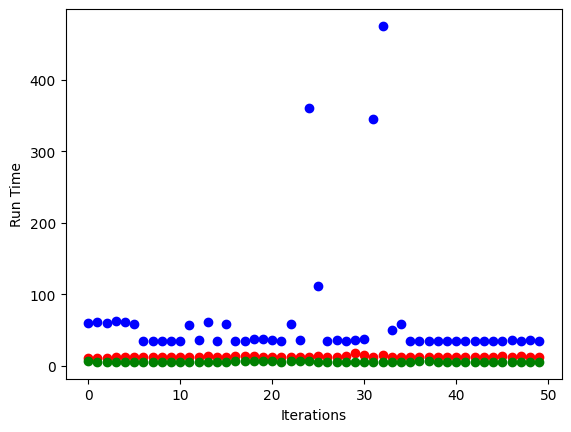

In [128]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(50)
y1 = times_DN_N #Lattice
y2 = times_DN_CLT #CLT
y3 = times_L_L #NetG

plt.scatter(x, y1, color='r')
plt.scatter(x, y2, color="blue")
plt.scatter(x, y3, color="g")
plt.xlabel("Iterations")
plt.ylabel("Run Time")
plt.show()

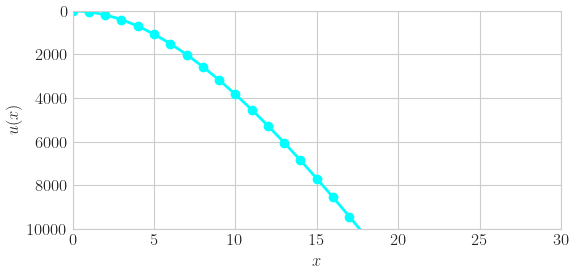

In [37]:
from matplotlib import pyplot
pyplot.style.use('../../../../qmcpy.mplstyle') #may need to be changed to find path to document in QMCSoftware folder
fig,ax = pyplot.subplots(figsize=(6,3))
ax.plot(solution,'-o')
ax.set_xlim([0,len(solution)-1]); ax.set_xlabel(r'$x$')
ax.set_ylim([10000,-10]);  ax.set_ylabel(r'$u(x)$');

## Parallel Evaluation

QMCPy can automatically multi-threaded requests to the model by setting `parallel=p` where `p` is the number of processors used by [multiprocessing.pool.ThreadPool](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.ThreadPool). Setting `parallel=True` is equivalent to setting `paralle=os.cpu_count()`.

In [10]:
import os
print('Available CPUs: %d'%os.cpu_count())

Available CPUs: 8


In [11]:
integrand = qp.UMBridgeWrapper(distribution,model,umbridge_config,parallel=8)
solution,data = qp.CubQMCNetG(integrand,abs_tol=10).integrate()
data

LDTransformData (AccumulateData Object)
    solution        [    0.       47.403   183.785 ... 19837.438 20807.061 21776.79 ]
    comb_bound_low  [    0.       47.393   183.746 ... 19834.606 20804.111 21773.722]
    comb_bound_high [    0.       47.413   183.824 ... 19840.269 20810.01  21779.858]
    comb_flags      [ True  True  True ...  True  True  True]
    n_total         2^(10)
    n               [1024. 1024. 1024. ... 1024. 1024. 1024.]
    time_integrate  2.683
CubQMCNetG (StoppingCriterion Object)
    abs_tol         10
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
UMBridgeWrapper (Integrand Object)
Uniform (TrueMeasure Object)
    lower_bound     1
    upper_bound     1.050
DigitalNetB2 (DiscreteDistribution Object)
    d               31
    dvec            [ 0  1  2 ... 28 29 30]
    randomize       LMS_DS
    graycode        0
    entropy         7
    spawn_key       ()

## Shut Down Docker Image

In [12]:
!docker rm -f muqbp_new

muqbp_new
